###### coding along with simplilearn lecture... this is literally my lecture.

In [26]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [27]:
train_path = r"C:\Users\12489\Documents\Data\titanictrain.csv"
df_train = pd.read_csv(train_path)

test_path = r"C:\Users\12489\Documents\Data\titanictest.csv"
df_test = pd.read_csv(test_path)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [30]:
print(f"""Train shape: {df_train.shape}
Test shape: {df_test.shape}""")

Train shape: (891, 12)
Test shape: (418, 11)


-----------------------------------------

### **Basic EDA**

#### (Exploratory Data Analysis)

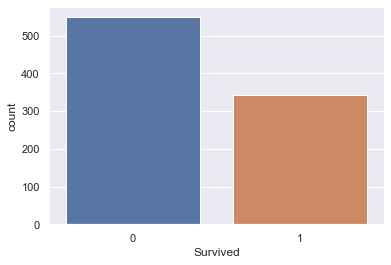

In [31]:
sns.countplot(x='Survived', data=df_train);

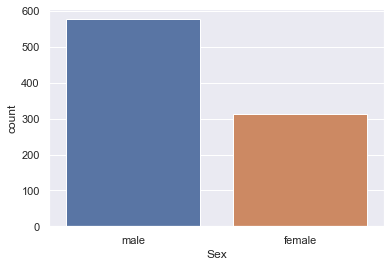

In [32]:
sns.countplot(x='Sex', data=df_train);

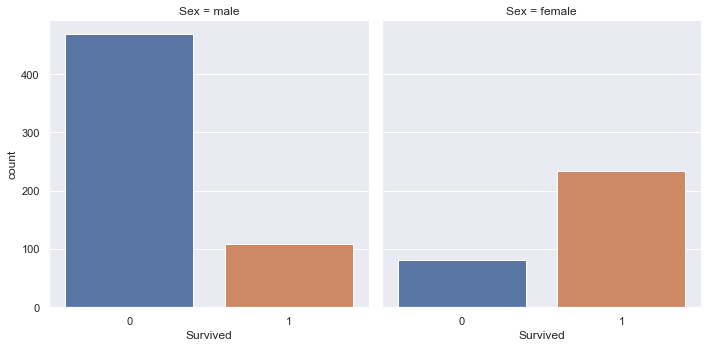

In [33]:
sns.catplot(x='Survived', col ='Sex', kind='count', data=df_train)

In [34]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

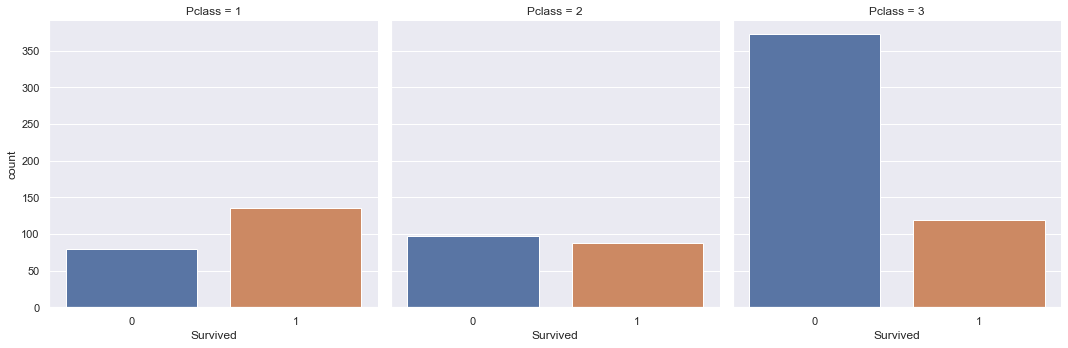

In [35]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=df_train)

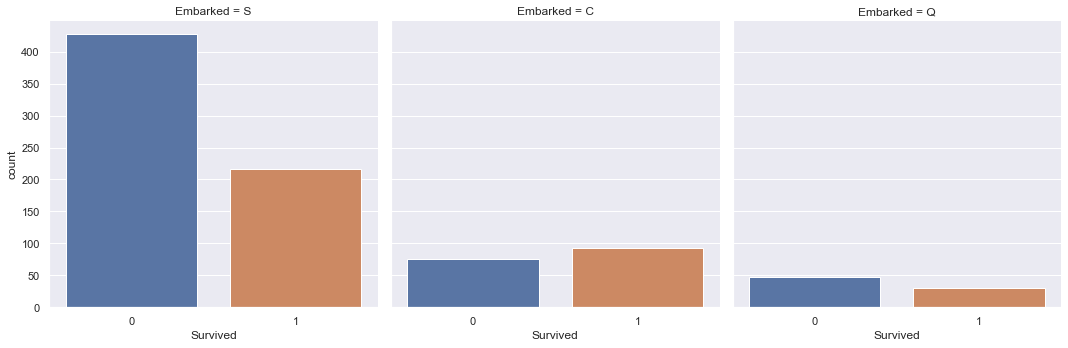

In [36]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train)

C:\Users\12489\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


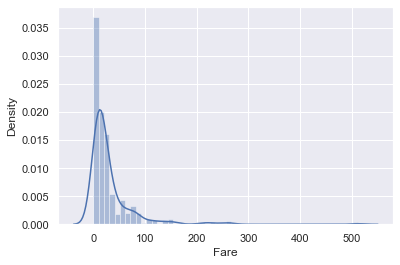

In [37]:
sns.distplot(df_train.Fare, kde=True);

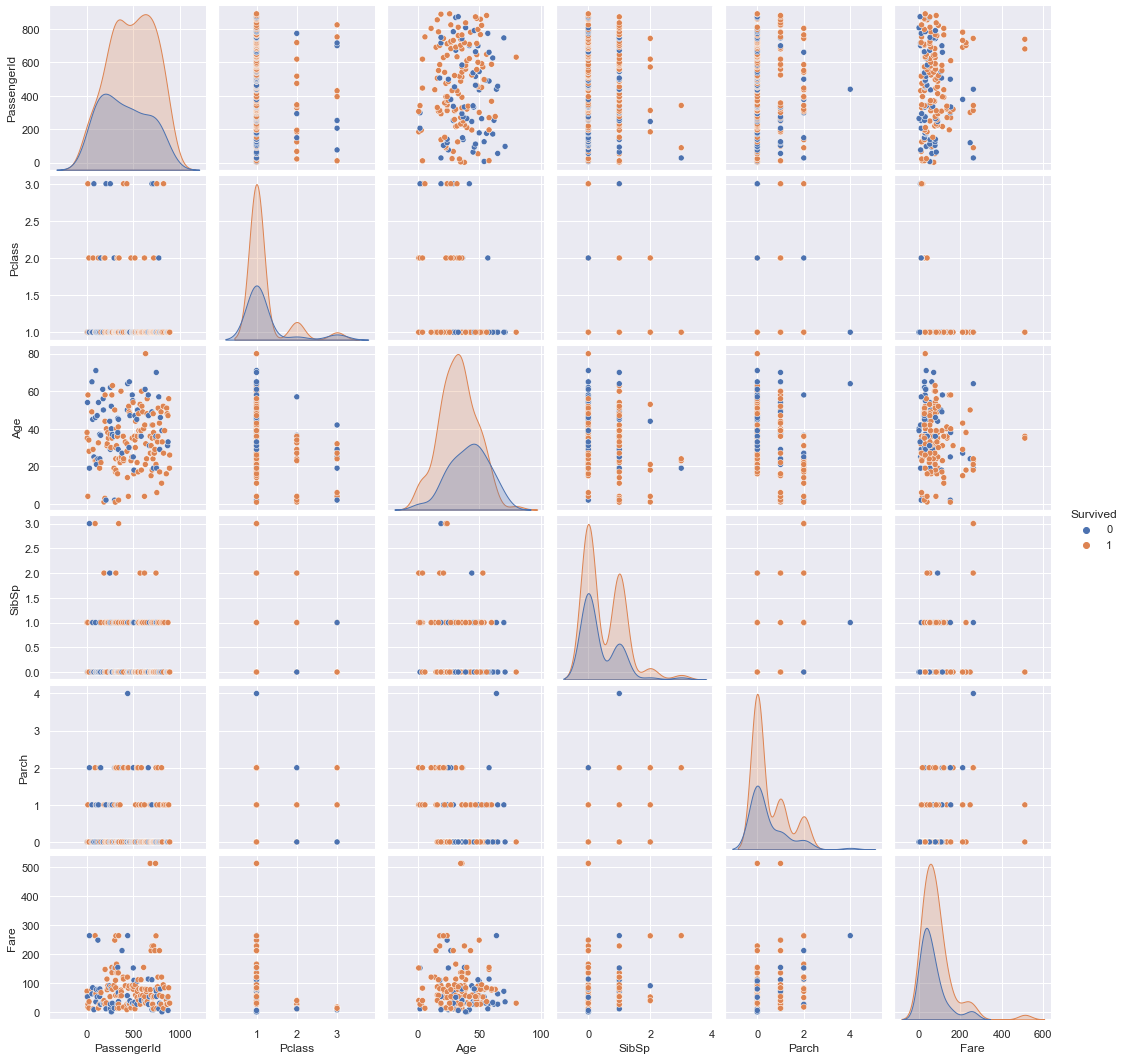

In [38]:
# lastly, let's look at data that have ZERO null...

df_train_drop = df_train.dropna()
sns.pairplot(df_train_drop, hue='Survived')

-------------------------------

## Data wrangling

In [39]:
# store target in container
survived_train = df_train.Survived

# concatenate train and test
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [40]:
# choose how to address null values
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

# make sure it worked
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

###### **since we most likely wont use 'Cabin' and 'Embarked', we may just leave them**

### time to encode (also part of "wrangling")

In [41]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

data = data[['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp']]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  1309 non-null   uint8  
 1   Fare      1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Pclass    1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


---------------------------------------

## **data is wrangled, so we can split**

In [42]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

############################

X = data_train.values
y = survived_train.values

test = data_test.values

---------------------------------

## **analyze**

In [43]:
tree_clf = DecisionTreeClassifier()

tree_clf = tree_clf.fit(X, y)

[Text(0.3411026519982993, 0.9791666666666666, 'X[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.17384141156462585, 0.9375, 'X[3] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.07482993197278912, 0.8958333333333334, 'X[2] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.05442176870748299, 0.8541666666666666, 'X[1] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.047619047619047616, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.061224489795918366, 0.8125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09523809523809523, 0.8541666666666666, 'X[1] <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.07482993197278912, 0.8125, 'X[1] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(0.06802721088435375, 0.7708333333333334, 'X[2] <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.047619047619047616, 0.7291666666666666, 'X[4] <= 0.5\ngini = 0.14\nsamples = 66\nvalue

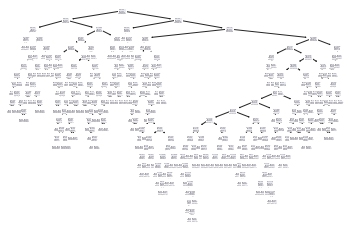

In [44]:
plot_tree(tree_clf)

###### import graphviz

-dot_data = tree.export_graphviz(tree_clf, out_file=None)

-graph = graphviz.Source(dot_data)

-graph.render("data")

------------------------------------

# predictions

In [45]:
y_pred = tree_clf.predict(test)
df_test['Survived'] = y_pred

tree_clf.score(X, y)

0.978675645342312